<a href="https://colab.research.google.com/github/vkukkapalli1/HDS_5210_vsk/blob/main/Final/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project analyzes **football team performance** across multiple leagues:
- **Premier League (EPL)**,
- **La Liga**,
- **Serie A**,  
- **Bundesliga**, and
- **Ligue 1**

Key metrics include:
- **Goal conversion rate**
- **Expected goals (xG)**
- **Half-time performance metrics** (win and comeback percentages)
- **Defensive performance**
- **League competitiveness**
- **Referee impact**



This notebook is structured to cater to:
- **Coaches**: Insights into team strategies and areas for improvement.
- **Bettors**: Identifying patterns for informed betting.
- **Analysts**: Advanced metrics for performance evaluation.
- **Fans**: Simple comparisons between top clubs in Europe.

### Project Goals
1. **Compare teams across leagues** in terms of attacking and defensive performance.
2. **Analyze referee influence** on match outcomes.
3. **Examine league competitiveness** using statistical metrics.
4. **Provide actionable insights** for coaches, bettors, and fans.


In [278]:
# I'm importing all the libraries I think are required for my project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
epl = pd.read_csv('/content/england-premier-league-2019-to-2020.csv')
laliga = pd.read_csv('/content/spain-la-liga-primera-division-2019-to-2020.csv')
bundesliga = pd.read_csv('/content/germany-bundesliga-1-2019-to-2020.csv')
serie_a = pd.read_csv('/content/italy-serie-a-2019-to-2020.csv')
ligue_1 = pd.read_csv('/content/france-le-championnat-2019-to-2020.csv')

eng_clubs_raw = pd.read_json('https://raw.githubusercontent.com/openfootball/football.json/refs/heads/master/2019-20/en.1.clubs.json')
spa_clubs_raw = pd.read_json('https://raw.githubusercontent.com/openfootball/football.json/refs/heads/master/2019-20/es.1.clubs.json')
ger_clubs_raw = pd.read_json('https://raw.githubusercontent.com/openfootball/football.json/refs/heads/master/2019-20/de.1.clubs.json')
ita_clubs_raw = pd.read_json('https://raw.githubusercontent.com/openfootball/football.json/refs/heads/master/2019-20/it.1.clubs.json')
fre_clubs_raw = pd.read_json('https://raw.githubusercontent.com/openfootball/football.json/refs/heads/master/2019-20/fr.1.clubs.json')


In [280]:
#storing this as a dictionary for later use in functions
league_data = {
    "epl": epl,
    "laliga": laliga,
    "bundesliga": bundesliga,
    "serie_a": serie_a,
    "ligue_1": ligue_1
}

In [281]:
eng_clubs_raw.head()
#as we can see the dataframe here is not normalized, so we need to normalize for us to use the data from JSONs
#this is same for all raw club data.

,name,clubs
0,Premier League 2019/20,"{'name': 'Watford FC', 'code': 'WAT', 'country..."
1,Premier League 2019/20,"{'name': 'AFC Bournemouth', 'code': 'BOU', 'co..."
2,Premier League 2019/20,"{'name': 'Norwich City FC', 'code': 'NOR', 'co..."
3,Premier League 2019/20,"{'name': 'Burnley FC', 'code': 'BUR', 'country..."
4,Premier League 2019/20,"{'name': 'Manchester United FC', 'code': 'MUN'..."


In [282]:
# Normalize the 'clubs' field for all leagues
eng_clubs = pd.json_normalize(eng_clubs_raw['clubs'])
spa_clubs = pd.json_normalize(spa_clubs_raw['clubs'])
ger_clubs = pd.json_normalize(ger_clubs_raw['clubs'])
ita_clubs = pd.json_normalize(ita_clubs_raw['clubs'])
fre_clubs = pd.json_normalize(fre_clubs_raw['clubs'])

In [283]:
eng_clubs.head()
#the JSONs are now normalized.

,name,code,country
0,Watford FC,WAT,England
1,AFC Bournemouth,BOU,England
2,Norwich City FC,NOR,England
3,Burnley FC,BUR,England
4,Manchester United FC,MUN,England


**Using epl dataframe as main example, Here are the basic data exploration from my datasets.**

In [284]:
epl.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [285]:
epl.dtypes

,0
Div,object
Date,object
Time,object
HomeTeam,object
AwayTeam,object
...,...
PCAHA,float64
MaxCAHH,float64
MaxCAHA,float64
AvgCAHH,float64


In [286]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 172.4+ KB


In [287]:
epl

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,E0,01/01/2020,15:00,Watford,Wolves,2,1,H,1,0,...,1.68,0.25,1.82,2.11,1.83,2.09,1.90,2.17,1.83,2.05
204,E0,01/01/2020,17:30,Man City,Everton,2,1,H,0,0,...,2.76,-1.50,1.88,2.05,1.92,2.01,1.95,2.14,1.88,2.00
205,E0,01/01/2020,17:30,Norwich,Crystal Palace,1,1,D,1,0,...,1.76,-0.25,2.08,1.85,2.05,1.88,2.19,1.92,2.04,1.84
206,E0,01/01/2020,17:30,West Ham,Bournemouth,4,0,H,3,0,...,1.94,-0.50,1.97,1.96,1.97,1.96,2.00,2.00,1.93,1.94


#Data Transformation:

- **To check the team names in my files and check if they are uniform or not.**

In [288]:
# Check unique team names in the match data
print("Unique HomeTeam names in match data:\n", epl['HomeTeam'].unique())

print("Unique HomeTeam names in match data:\n", laliga['HomeTeam'].unique())

print("Unique HomeTeam names in match data:\n", bundesliga['HomeTeam'].unique())

print("Unique HomeTeam names in match data:\n", ligue_1['HomeTeam'].unique())

print("Unique HomeTeam names in match data:\n", serie_a['HomeTeam'].unique())

# Check unique names in the club data
print("Unique names in club data:\n", eng_clubs['name'].unique())

print("Unique names in club data:\n", spa_clubs['name'].unique())

print("Unique names in club data:\n", ger_clubs['name'].unique())

print("Unique names in club data:\n", fre_clubs['name'].unique())

print("Unique names in club data:\n", ita_clubs['name'].unique())




Unique HomeTeam names in match data:
 ['Liverpool' 'West Ham' 'Bournemouth' 'Burnley' 'Crystal Palace' 'Watford'
 'Tottenham' 'Leicester' 'Newcastle' 'Man United' 'Arsenal' 'Aston Villa'
 'Brighton' 'Everton' 'Norwich' 'Southampton' 'Man City'
 'Sheffield United' 'Chelsea' 'Wolves']
Unique HomeTeam names in match data:
 ['Ath Bilbao' 'Celta' 'Valencia' 'Mallorca' 'Leganes' 'Villarreal'
 'Alaves' 'Espanol' 'Betis' 'Ath Madrid' 'Granada' 'Levante' 'Osasuna'
 'Real Madrid' 'Getafe' 'Barcelona' 'Sevilla' 'Sociedad' 'Eibar'
 'Valladolid']
Unique HomeTeam names in match data:
 ['Bayern Munich' 'Dortmund' 'Freiburg' 'Leverkusen' 'Werder Bremen'
 'Wolfsburg' "M'gladbach" 'Ein Frankfurt' 'Union Berlin' 'FC Koln'
 'Augsburg' 'Fortuna Dusseldorf' 'Hoffenheim' 'Mainz' 'Paderborn'
 'Schalke 04' 'RB Leipzig' 'Hertha']
Unique HomeTeam names in match data:
 ['Monaco' 'Marseille' 'Angers' 'Brest' 'Dijon' 'Montpellier' 'Nice'
 'Lille' 'Strasbourg' 'Paris SG' 'Lyon' 'Nantes' 'Amiens' 'Bordeaux'
 'Metz' '

- **Since the names in the csv and JSONs are different, Below are the mapings so the names are similar in their respective data files.**

In [289]:
epl_mapping = {
    "Liverpool": "Liverpool FC",
    "West Ham": "West Ham United FC",
    "Bournemouth": "AFC Bournemouth",
    "Burnley": "Burnley FC",
    "Crystal Palace": "Crystal Palace FC",
    "Watford": "Watford FC",
    "Tottenham": "Tottenham Hotspur FC",
    "Leicester": "Leicester City FC",
    "Newcastle": "Newcastle United FC",
    "Man United": "Manchester United FC",
    "Man City": "Manchester City FC",
    "Arsenal": "Arsenal FC",
    "Aston Villa": "Aston Villa FC",
    "Brighton": "Brighton & Hove Albion FC",
    "Everton": "Everton FC",
    "Norwich": "Norwich City FC",
    "Southampton": "Southampton FC",
    "Sheffield United": "Sheffield United FC",
    "Chelsea": "Chelsea FC",
    "Wolves": "Wolverhampton Wanderers FC"
}

In [290]:
laliga_mapping = {
    "Ath Bilbao": "Athletic Club Bilbao",
    "Celta": "RC Celta Vigo",
    "Valencia": "Valencia CF",
    "Mallorca": "RCD Mallorca",
    "Leganes": "CD Leganés",
    "Villarreal": "Villarreal CF",
    "Alaves": "Deportivo Alavés",
    "Espanol": "RCD Espanyol",
    "Betis": "Real Betis",
    "Ath Madrid": "Atlético Madrid",
    "Granada": "Granada CF",
    "Levante": "Levante UD",
    "Osasuna": "CA Osasuna",
    "Real Madrid": "Real Madrid",
    "Getafe": "Getafe CF",
    "Barcelona": "FC Barcelona",
    "Sevilla": "Sevilla FC",
    "Sociedad": "Real Sociedad",
    "Eibar": "SD Eibar",
    "Valladolid": "Real Valladolid CF"
}

In [291]:
bundesliga_mapping = {
    "Bayern Munich": "Bayern München",
    "Dortmund": "Borussia Dortmund",
    "Freiburg": "SC Freiburg",
    "Leverkusen": "Bayer 04 Leverkusen",
    "Werder Bremen": "Werder Bremen",
    "Wolfsburg": "VfL Wolfsburg",
    "M'gladbach": "Bor. Mönchengladbach",
    "Ein Frankfurt": "Eintracht Frankfurt",
    "Union Berlin": "1. FC Union Berlin",
    "FC Koln": "1. FC Köln",
    "Augsburg": "FC Augsburg",
    "Fortuna Dusseldorf": "Fortuna Düsseldorf",
    "Hoffenheim": "TSG 1899 Hoffenheim",
    "Mainz": "1. FSV Mainz 05",
    "Paderborn": "SC Paderborn 07",
    "Schalke 04": "FC Schalke 04",
    "RB Leipzig": "RB Leipzig",
    "Hertha": "Hertha BSC"
}

In [292]:
ligue_1_mapping = {
    "Monaco": "AS Monaco",
    "Marseille": "Olympique de Marseille",
    "Angers": "Angers SCO",
    "Brest": "Stade Brestois 29",
    "Dijon": "Dijon FCO",
    "Montpellier": "Montpellier HSC",
    "Nice": "OGC Nice",
    "Lille": "Lille OSC",
    "Strasbourg": "RC Strasbourg",
    "Paris SG": "Paris Saint-Germain",
    "Lyon": "Olympique Lyonnais",
    "Nantes": "FC Nantes",
    "Amiens": "Amiens SC",
    "Bordeaux": "Girondins de Bordeaux",
    "Metz": "FC Metz",
    "Nimes": "Nîmes Olympique",
    "Toulouse": "Toulouse FC",
    "St Etienne": "AS Saint-Étienne",
    "Reims": "Stade de Reims",
    "Rennes": "Stade Rennais FC"
}

In [293]:
serie_a_mapping = {
    "Parma": "Parma",
    "Fiorentina": "ACF Fiorentina",
    "Udinese": "Udinese Calcio",
    "Cagliari": "Cagliari Calcio",
    "Roma": "AS Roma",
    "Sampdoria": "UC Sampdoria",
    "Spal": "SPAL Ferrara",
    "Torino": "Torino FC",
    "Verona": "Hellas Verona",
    "Inter": "FC Internazionale Milano",
    "Bologna": "Bologna FC",
    "Milan": "AC Milan",
    "Juventus": "Juventus",
    "Lazio": "SS Lazio",
    "Atalanta": "Atalanta Bergamo",
    "Genoa": "Genoa CFC",
    "Lecce": "US Lecce",
    "Sassuolo": "US Sassuolo Calcio",
    "Napoli": "SSC Napoli",
    "Brescia": "Brescia Calcio"
}

- **Replacing the teams names with the help of above mappings in my dataframe**

In [294]:
# Apply mappings to EPL
epl['HomeTeam'] = epl['HomeTeam'].replace(epl_mapping)
epl['AwayTeam'] = epl['AwayTeam'].replace(epl_mapping)

# Apply mappings to La Liga
laliga['HomeTeam'] = laliga['HomeTeam'].replace(laliga_mapping)
laliga['AwayTeam'] = laliga['AwayTeam'].replace(laliga_mapping)

# Apply mappings to Bundesliga
bundesliga['HomeTeam'] = bundesliga['HomeTeam'].replace(bundesliga_mapping)
bundesliga['AwayTeam'] = bundesliga['AwayTeam'].replace(bundesliga_mapping)

# Apply mappings to Ligue 1
ligue_1['HomeTeam'] = ligue_1['HomeTeam'].replace(ligue_1_mapping)
ligue_1['AwayTeam'] = ligue_1['AwayTeam'].replace(ligue_1_mapping)

# Apply mappings to Serie A
serie_a['HomeTeam'] = serie_a['HomeTeam'].replace(serie_a_mapping)
serie_a['AwayTeam'] = serie_a['AwayTeam'].replace(serie_a_mapping)


- **Merging the datafiles with their respective leagues based on team names and codes.**
- **Also doing some transformations like dropping and renaming few columns.**

In [295]:
# Merge EPL match data with the club data to add team codes
epl = epl.merge(eng_clubs[['name', 'code']], left_on='HomeTeam', right_on='name', how='left', suffixes=('', '_home'))
epl = epl.merge(eng_clubs[['name', 'code']], left_on='AwayTeam', right_on='name', how='left', suffixes=('', '_away'))

epl = epl.drop(columns=['name', 'name_away'])

epl = epl.rename(columns={'code': 'HomeTeamCode', 'code_away': 'AwayTeamCode'})

print(epl[['HomeTeam', 'HomeTeamCode', 'AwayTeam', 'AwayTeamCode']].head())


             HomeTeam HomeTeamCode             AwayTeam AwayTeamCode
0        Liverpool FC          LIV      Norwich City FC          NOR
1  West Ham United FC          WHU   Manchester City FC          MCI
2     AFC Bournemouth          BOU  Sheffield United FC          SHU
3          Burnley FC          BUR       Southampton FC          SOU
4   Crystal Palace FC          CRY           Everton FC          EVE


In [296]:
# Merge La Liga match data with the club data to add team codes
laliga = laliga.merge(spa_clubs[['name', 'code']], left_on='HomeTeam', right_on='name', how='left', suffixes=('', '_home'))
laliga = laliga.merge(spa_clubs[['name', 'code']], left_on='AwayTeam', right_on='name', how='left', suffixes=('', '_away'))

laliga = laliga.drop(columns=['name', 'name_away'])

laliga = laliga.rename(columns={'code': 'HomeTeamCode', 'code_away': 'AwayTeamCode'})

print(laliga[['HomeTeam', 'HomeTeamCode', 'AwayTeam', 'AwayTeamCode']].head())

               HomeTeam HomeTeamCode       AwayTeam AwayTeamCode
0  Athletic Club Bilbao          ATH   FC Barcelona          BAR
1         RC Celta Vigo          CEL    Real Madrid          RMD
2           Valencia CF          VAL  Real Sociedad          RSO
3          RCD Mallorca          MLL       SD Eibar         None
4            CD Leganés         None     CA Osasuna          OSA


In [297]:
# Merge Bundesliga match data with the club data to add team codes
bundesliga = bundesliga.merge(ger_clubs[['name', 'code']], left_on='HomeTeam', right_on='name', how='left', suffixes=('', '_home'))
bundesliga = bundesliga.merge(ger_clubs[['name', 'code']], left_on='AwayTeam', right_on='name', how='left', suffixes=('', '_away'))

bundesliga = bundesliga.drop(columns=['name', 'name_away'])

bundesliga = bundesliga.rename(columns={'code': 'HomeTeamCode', 'code_away': 'AwayTeamCode'})

print(bundesliga[['HomeTeam', 'HomeTeamCode', 'AwayTeam', 'AwayTeamCode']].head())


              HomeTeam HomeTeamCode            AwayTeam AwayTeamCode
0       Bayern München          FCB          Hertha BSC          BSC
1    Borussia Dortmund          BVB         FC Augsburg          FCA
2          SC Freiburg          SCF     1. FSV Mainz 05          M05
3  Bayer 04 Leverkusen          B04     SC Paderborn 07          SCP
4        Werder Bremen          BRE  Fortuna Düsseldorf          F95


In [298]:
# Merge Serie A match data with the club data to add team codes
serie_a = serie_a.merge(ita_clubs[['name', 'code']], left_on='HomeTeam', right_on='name', how='left', suffixes=('', '_home'))
serie_a = serie_a.merge(ita_clubs[['name', 'code']], left_on='AwayTeam', right_on='name', how='left', suffixes=('', '_away'))

serie_a = serie_a.drop(columns=['name', 'name_away'])

serie_a = serie_a.rename(columns={'code': 'HomeTeamCode', 'code_away': 'AwayTeamCode'})

print(serie_a[['HomeTeam', 'HomeTeamCode', 'AwayTeam', 'AwayTeamCode']].head())


          HomeTeam HomeTeamCode        AwayTeam AwayTeamCode
0            Parma          PAR        Juventus          JUV
1   ACF Fiorentina          FIO      SSC Napoli          NAP
2   Udinese Calcio          UDI        AC Milan          MIL
3  Cagliari Calcio          CAG  Brescia Calcio         None
4          AS Roma          ROM       Genoa CFC          GEN


In [299]:
# Merge Ligue 1 match data with the club data to add team codes
ligue_1 = ligue_1.merge(fre_clubs[['name', 'code']], left_on='HomeTeam', right_on='name', how='left', suffixes=('', '_home'))
ligue_1 = ligue_1.merge(fre_clubs[['name', 'code']], left_on='AwayTeam', right_on='name', how='left', suffixes=('', '_away'))

ligue_1 = ligue_1.drop(columns=['name', 'name_away'])

ligue_1 = ligue_1.rename(columns={'code': 'HomeTeamCode', 'code_away': 'AwayTeamCode'})

print(ligue_1[['HomeTeam', 'HomeTeamCode', 'AwayTeam', 'AwayTeamCode']].head())


                 HomeTeam HomeTeamCode               AwayTeam AwayTeamCode
0               AS Monaco          ASM     Olympique Lyonnais           OL
1  Olympique de Marseille           OM         Stade de Reims          SDR
2              Angers SCO          SCO  Girondins de Bordeaux         FCGB
3       Stade Brestois 29         SB29            Toulouse FC          TFC
4               Dijon FCO         DFCO       AS Saint-Étienne         ASSE


- **Converting the 'Date' column from object to datetime**

In [300]:
epl['Date'] = pd.to_datetime(epl['Date'], format='%d/%m/%Y')

laliga['Date'] = pd.to_datetime(laliga['Date'], format='%d/%m/%Y')

bundesliga['Date'] = pd.to_datetime(bundesliga['Date'], format='%d/%m/%Y')

serie_a['Date'] = pd.to_datetime(serie_a['Date'], format='%d/%m/%Y')

ligue_1['Date'] = pd.to_datetime(ligue_1['Date'], format='%d/%m/%Y')


- *You can see below that the datatype has been changed for Date column from our initial data exploration*

In [301]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 108 entries, Div to AwayTeamCode
dtypes: datetime64[ns](1), float64(82), int64(16), object(9)
memory usage: 175.6+ KB


In [302]:
epl.dtypes

,0
Div,object
Date,datetime64[ns]
Time,object
HomeTeam,object
AwayTeam,object
...,...
MaxCAHA,float64
AvgCAHH,float64
AvgCAHA,float64
HomeTeamCode,object


- **Adding a Total Goals column to the dataframes to show the no. of goals scored in each match**

In [303]:
epl['TotalGoals'] = epl['FTHG'] + epl['FTAG']

laliga['TotalGoals'] = laliga['FTHG'] + laliga['FTAG']

bundesliga['TotalGoals'] = bundesliga['FTHG'] + bundesliga['FTAG']

serie_a['TotalGoals'] = serie_a['FTHG'] + serie_a['FTAG']

ligue_1['TotalGoals'] = ligue_1['FTHG'] + ligue_1['FTAG']


In [304]:
epl.head()
# to show the newly added column into the df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HomeTeamCode,AwayTeamCode,TotalGoals
0,E0,2019-08-09,20:00,Liverpool FC,Norwich City FC,4,1,H,4,0,...,1.99,1.94,1.98,1.99,2.07,1.90,1.99,LIV,NOR,5
1,E0,2019-08-10,12:30,West Ham United FC,Manchester City FC,0,5,A,0,1,...,1.95,1.96,1.97,2.07,1.98,1.97,1.92,WHU,MCI,5
2,E0,2019-08-10,15:00,AFC Bournemouth,Sheffield United FC,1,1,D,0,0,...,1.95,1.98,1.95,2.00,1.96,1.96,1.92,BOU,SHU,2
3,E0,2019-08-10,15:00,Burnley FC,Southampton FC,3,0,H,0,0,...,2.03,1.89,2.03,1.90,2.07,1.86,2.02,BUR,SOU,3
4,E0,2019-08-10,15:00,Crystal Palace FC,Everton FC,0,0,D,0,0,...,2.08,1.97,1.96,2.03,2.08,1.96,1.93,CRY,EVE,0


In [305]:
bundesliga.head()
#same as above but with different league

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,HomeTeamCode,AwayTeamCode,TotalGoals
0,D1,2019-08-16,19:30,Bayern München,Hertha BSC,2,2,D,1,2,...,1.90,1.99,1.93,2.04,1.93,1.98,1.91,FCB,BSC,4
1,D1,2019-08-17,14:30,Borussia Dortmund,FC Augsburg,5,1,H,1,1,...,2.01,1.92,2.00,1.98,2.04,1.91,1.97,BVB,FCA,6
2,D1,2019-08-17,14:30,SC Freiburg,1. FSV Mainz 05,3,0,H,0,0,...,2.01,1.94,1.97,1.97,2.06,1.90,1.99,SCF,M05,3
3,D1,2019-08-17,14:30,Bayer 04 Leverkusen,SC Paderborn 07,3,2,H,2,2,...,1.86,2.05,1.86,2.15,1.91,2.03,1.85,B04,SCP,5
4,D1,2019-08-17,14:30,Werder Bremen,Fortuna Düsseldorf,1,3,A,0,1,...,2.01,1.92,2.00,1.95,2.11,1.89,2.00,BRE,F95,4


- **Creating functions to get few important metrics**

In [306]:
def goal_conversion_rate(team_name, league_name):
    """
    Calculates the goal conversion rate for a specific team in a specific league.

    Parameters:
        team_name (str): Name of the team (e.g., "Liverpool").
        league_name (str): Key for the league dataset in the league_data dictionary (e.g., "epl").

    Returns:
        float: Goal conversion rate (goals scored per total shots).

    Raises:
        ValueError: If the league_name is invalid or if the team_name is not found in the dataset.
    """
    if league_name not in league_data:
        raise ValueError(f"League '{league_name}' is not valid. Choose from {list(league_data.keys())}.")

    df = league_data[league_name]

    if team_name not in df['HomeTeam'].values and team_name not in df['AwayTeam'].values:
        raise ValueError(f"Team '{team_name}' not found in the league '{league_name}'.")

    team_data = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)]
    total_shots = team_data['HS'].sum() + team_data['AS'].sum()
    total_goals = team_data['FTHG'].sum() + team_data['FTAG'].sum()

    if total_shots == 0:
        return 0.0

    return round(total_goals / total_shots, 2)


In [307]:
goal_conversion_rate("Liverpool FC","epl")

0.13

In [308]:
goal_conversion_rate('FC Barcelona','laliga')

0.17

In [309]:
def halftime_win_percentage(team_name, league_name):
    """
    Calculates the percentage of matches a team has won after leading at half-time.

    Parameters:
        team_name (str): Name of the team (e.g., "Liverpool").
        league_name (str): Key for the league dataset in the league_data dictionary (e.g., "epl").

    Returns:
        float: Win percentage after leading at half-time.

    Raises:
        ValueError: If the team_name is not found in the league data.
    """
    if league_name not in league_data:
        raise ValueError(f"League '{league_name}' is not valid. Choose from {list(league_data.keys())}.")

    df = league_data[league_name]

    if team_name not in df['HomeTeam'].values and team_name not in df['AwayTeam'].values:
        raise ValueError(f"Team '{team_name}' not found in the league '{league_name}'.")

    leading_ht = df[
        ((df['HomeTeam'] == team_name) & (df['HTR'] == 'H')) |
        ((df['AwayTeam'] == team_name) & (df['HTR'] == 'A'))
    ]

    wins = leading_ht[
        ((leading_ht['HomeTeam'] == team_name) & (leading_ht['FTR'] == 'H')) |
        ((leading_ht['AwayTeam'] == team_name) & (leading_ht['FTR'] == 'A'))
    ]

    if len(leading_ht) == 0:
        return 0.0

    return round((len(wins) / len(leading_ht)) * 100, 2)


In [310]:
halftime_win_percentage('Liverpool FC','laliga')
#raising value error we defined

ValueError: Team 'Liverpool FC' not found in the league 'laliga'.

In [311]:
halftime_win_percentage('Liverpool FC','epl')

100.0

In [312]:
halftime_win_percentage('Manchester City FC','epl')

81.82

In [313]:
def halftime_comeback_percentage(team_name, league_name):
    """
    Calculates the percentage of matches a team has won or drawn after trailing at half-time.

    Parameters:
        team_name (str): Name of the team (e.g., "Liverpool").
        league_name (str): Key for the league dataset in the league_data dictionary (e.g., "epl").

    Returns:
        float: Comeback percentage after trailing at half-time.

    Raises:
        ValueError: If the team_name is not found in the league data.
    """
    if league_name not in league_data:
        raise ValueError(f"League '{league_name}' is not valid. Choose from {list(league_data.keys())}.")

    df = league_data[league_name]

    if team_name not in df['HomeTeam'].values and team_name not in df['AwayTeam'].values:
        raise ValueError(f"Team '{team_name}' not found in the league '{league_name}'.")

    trailing_ht = df[
        ((df['HomeTeam'] == team_name) & (df['HTR'] == 'A')) |
        ((df['AwayTeam'] == team_name) & (df['HTR'] == 'H'))
    ]

    comebacks = trailing_ht[
        ((trailing_ht['HomeTeam'] == team_name) & (trailing_ht['FTR'] == 'H')) |
        ((trailing_ht['AwayTeam'] == team_name) & (trailing_ht['FTR'] == 'A')) |
        (trailing_ht['FTR'] == 'D')
    ]

    if len(trailing_ht) == 0:
        return 0.0

    return round((len(comebacks) / len(trailing_ht)) * 100, 2)


In [314]:
halftime_comeback_percentage('FC Barcelona','laliga')

66.67

In [315]:
halftime_comeback_percentage('Bayern München', 'bundesliga')

33.33

In [316]:
def defensive_performance(team_name, league_name):
    """
    Calculates the defensive performance of a team based on goals conceded.

    Parameters:
        team_name (str): Name of the team (e.g., "Liverpool").
        league_name (str): Key for the league dataset in the league_data dictionary (e.g., "epl").

    Returns:
        int: Total goals conceded by the team.

    Raises:
        ValueError: If the team_name is not found in the league data.
    """
    if league_name not in league_data:
        raise ValueError(f"League '{league_name}' is not valid. Choose from {list(league_data.keys())}.")

    df = league_data[league_name]

    if team_name not in df['HomeTeam'].values and team_name not in df['AwayTeam'].values:
        raise ValueError(f"Team '{team_name}' not found in the league '{league_name}'.")

    team_data = df[(df['HomeTeam'] == team_name) | (df['AwayTeam'] == team_name)]
    goals_conceded = team_data.loc[team_data['HomeTeam'] == team_name, 'FTAG'].sum() + \
                     team_data.loc[team_data['AwayTeam'] == team_name, 'FTHG'].sum()

    return int(goals_conceded)


In [317]:
defensive_performance('Liverpool FC','epl')

14

In [318]:
defensive_performance('Norwich City FC','epl')

41

In [319]:
defensive_performance('Paris Saint-Germain','ligue_1')

10

- ***Using Aggregate functions***

In [320]:
# use of aggregates, Example for EPL
epl_total_goals = epl.groupby('HomeTeam')['FTHG'].sum() + epl.groupby('AwayTeam')['FTAG'].sum()
epl_total_goals = epl_total_goals.sort_values(ascending=False)
print(epl_total_goals)

HomeTeam
Manchester City FC            56
Liverpool FC                  47
Leicester City FC             46
Tottenham Hotspur FC          36
Chelsea FC                    36
Manchester United FC          32
Wolverhampton Wanderers FC    30
Arsenal FC                    28
Aston Villa FC                27
Brighton & Hove Albion FC     25
Southampton FC                25
West Ham United FC            25
Everton FC                    24
Burnley FC                    24
Sheffield United FC           23
Norwich City FC               22
Newcastle United FC           20
AFC Bournemouth               20
Crystal Palace FC             19
Watford FC                    17
dtype: int64


In [321]:
# use of aggregates, Example for laliga
laliga_total_goals = laliga.groupby('HomeTeam')['FTHG'].sum() + laliga.groupby('AwayTeam')['FTAG'].sum()
laliga_total_goals = laliga_total_goals.sort_values(ascending=False)
print(laliga_total_goals)

HomeTeam
FC Barcelona            47
Real Madrid             33
Real Sociedad           32
Villarreal CF           31
Valencia CF             28
Getafe CF               26
Real Betis              25
CA Osasuna              25
Levante UD              25
Granada CF              24
Sevilla FC              23
Atlético Madrid         20
Athletic Club Bilbao    19
Deportivo Alavés        19
RCD Mallorca            18
SD Eibar                18
RC Celta Vigo           15
Real Valladolid CF      15
CD Leganés              14
RCD Espanyol            12
dtype: int64


In [322]:
home_goals = epl.groupby('HomeTeam')['FTHG'].sum()
away_goals = epl.groupby('AwayTeam')['FTAG'].sum()
total_goals = home_goals + away_goals

home_matches = epl.groupby('HomeTeam').size()
away_matches = epl.groupby('AwayTeam').size()
total_matches = home_matches + away_matches

avg_goals = total_goals / total_matches
avg_goals_sorted = avg_goals.sort_values(ascending=False)

print(avg_goals_sorted)


HomeTeam
Manchester City FC            2.666667
Liverpool FC                  2.473684
Leicester City FC             2.190476
Tottenham Hotspur FC          1.714286
Chelsea FC                    1.714286
Manchester United FC          1.523810
Wolverhampton Wanderers FC    1.428571
Arsenal FC                    1.333333
Aston Villa FC                1.285714
West Ham United FC            1.250000
Brighton & Hove Albion FC     1.190476
Southampton FC                1.190476
Sheffield United FC           1.150000
Everton FC                    1.142857
Burnley FC                    1.142857
Norwich City FC               1.047619
Newcastle United FC           0.952381
AFC Bournemouth               0.952381
Crystal Palace FC             0.904762
Watford FC                    0.809524
dtype: float64


In [323]:
# Mean Goals Scored by Each Team (Home + Away)
mean_goals = epl.groupby('HomeTeam')['FTHG'].mean() + epl.groupby('AwayTeam')['FTAG'].mean()
mean_goals = mean_goals.sort_values(ascending=False)
print(mean_goals)

HomeTeam
Manchester City FC            5.336364
Liverpool FC                  4.922222
Leicester City FC             4.354545
Tottenham Hotspur FC          3.463636
Chelsea FC                    3.372727
Manchester United FC          3.090909
Wolverhampton Wanderers FC    2.872727
Arsenal FC                    2.645455
Aston Villa FC                2.572727
West Ham United FC            2.500000
Southampton FC                2.400000
Brighton & Hove Albion FC     2.363636
Sheffield United FC           2.300000
Everton FC                    2.290909
Burnley FC                    2.272727
Norwich City FC               2.045455
AFC Bournemouth               1.909091
Newcastle United FC           1.900000
Crystal Palace FC             1.809091
Watford FC                    1.600000
dtype: float64


In [324]:
# Mean Goals Conceded by Each Team
mean_goals_conceded = epl.groupby('HomeTeam')['FTAG'].mean() + epl.groupby('AwayTeam')['FTHG'].mean()
mean_goals_conceded = mean_goals_conceded.sort_values(ascending=True)
print(mean_goals_conceded)

HomeTeam
Liverpool FC                  1.455556
Leicester City FC             1.809091
Sheffield United FC           1.900000
Crystal Palace FC             2.172727
Manchester City FC            2.309091
Manchester United FC          2.363636
Wolverhampton Wanderers FC    2.581818
Chelsea FC                    2.727273
Brighton & Hove Albion FC     2.790909
Tottenham Hotspur FC          2.818182
Arsenal FC                    2.845455
Everton FC                    3.009091
AFC Bournemouth               3.036364
Newcastle United FC           3.190909
West Ham United FC            3.200000
Burnley FC                    3.245455
Watford FC                    3.272727
Aston Villa FC                3.490909
Southampton FC                3.572727
Norwich City FC               3.872727
dtype: float64


#Visualizations:

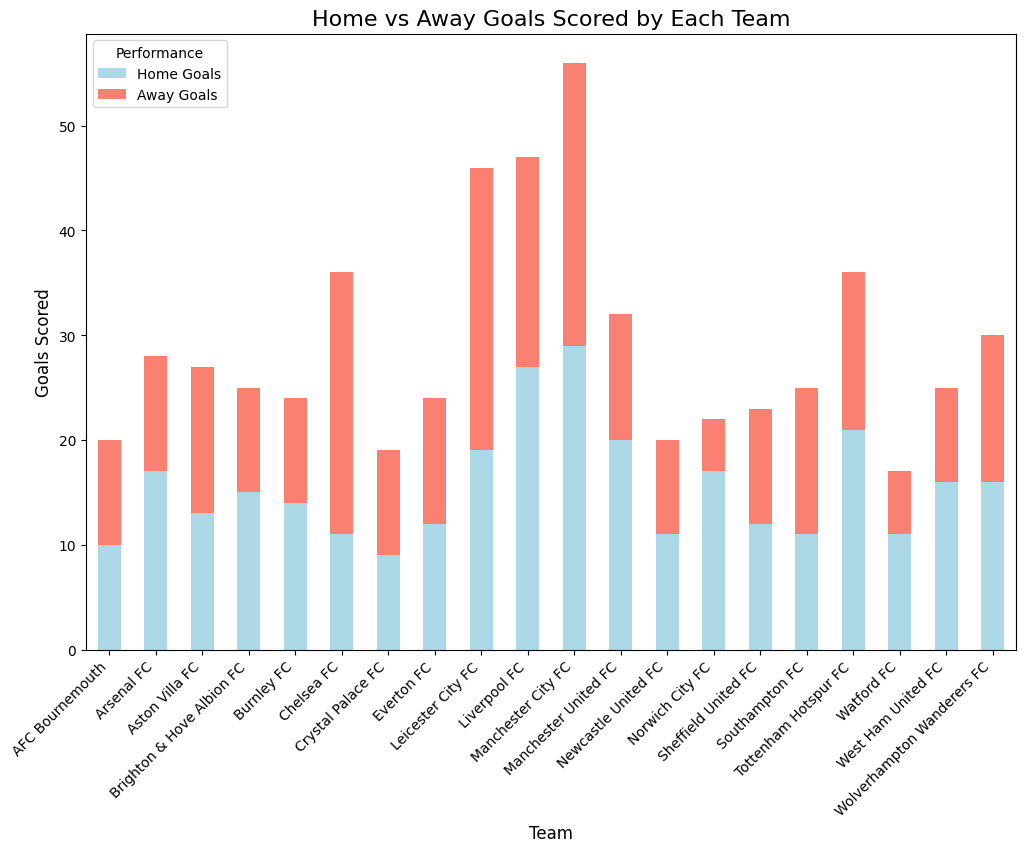

In [325]:
# Home vs Away Performance (Goals Scored)
home_goals = epl.groupby('HomeTeam')['FTHG'].sum()
away_goals = epl.groupby('AwayTeam')['FTAG'].sum()

home_away_goals = pd.DataFrame({'Home Goals': home_goals,'Away Goals': away_goals}).fillna(0)
home_away_goals.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'salmon'])
plt.title('Home vs Away Goals Scored by Each Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Goals Scored', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Performance', loc='upper left')
plt.show()


- *The above stacked bar chart shows the total goals scored by each team with a clear representation of Home and Away Goals.*
- *It shows Chelsea FC has scored more Away goals than Home goals, while Norwich City FC has score most of their goals at Home.*

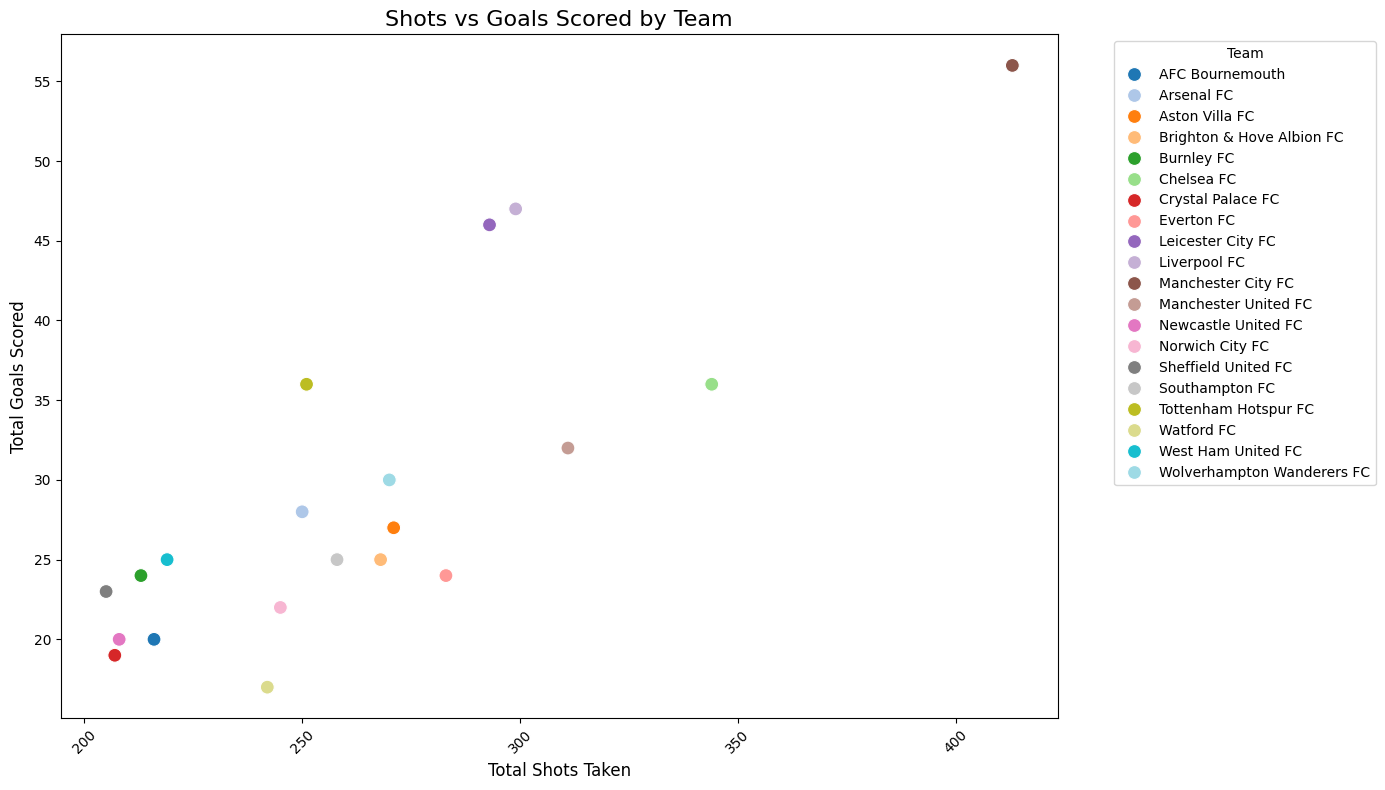

In [326]:
# Calculate total goals scored and total shots taken for each team
home_goals = epl.groupby('HomeTeam')['FTHG'].sum()
away_goals = epl.groupby('AwayTeam')['FTAG'].sum()
home_shots = epl.groupby('HomeTeam')['HS'].sum()
away_shots = epl.groupby('AwayTeam')['AS'].sum()

total_goals = home_goals.add(away_goals, fill_value=0)
total_shots = home_shots.add(away_shots, fill_value=0)

team_performance = pd.DataFrame({
    'Team': total_goals.index,
    'Goals': total_goals.values,
    'Shots': total_shots.values
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=team_performance, x='Shots', y='Goals', hue='Team', palette='tab20', s=100, marker='o')

plt.title('Shots vs Goals Scored by Team', fontsize=16)
plt.xlabel('Total Shots Taken', fontsize=12)
plt.ylabel('Total Goals Scored', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- *The above scatterplot shows the Total Goals Scored by each team opposed to total shots taken.*
- *As it shows Manchester City FC has taken the most shots and also scored the most goals.*
- *The scatterplot also shows that Chelsea FC has the second most no.of shots taken but have not converted them to goals. Liverpool FC has the second highest no. of goals but ranks 4th on total shots taken.*
- *This image can be helpful in showing the goal coversion rate for the teams.*

<ipython-input-327-55d1de76a7f8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=epl, x='HomeTeam', y='GoalDifference', palette="coolwarm")


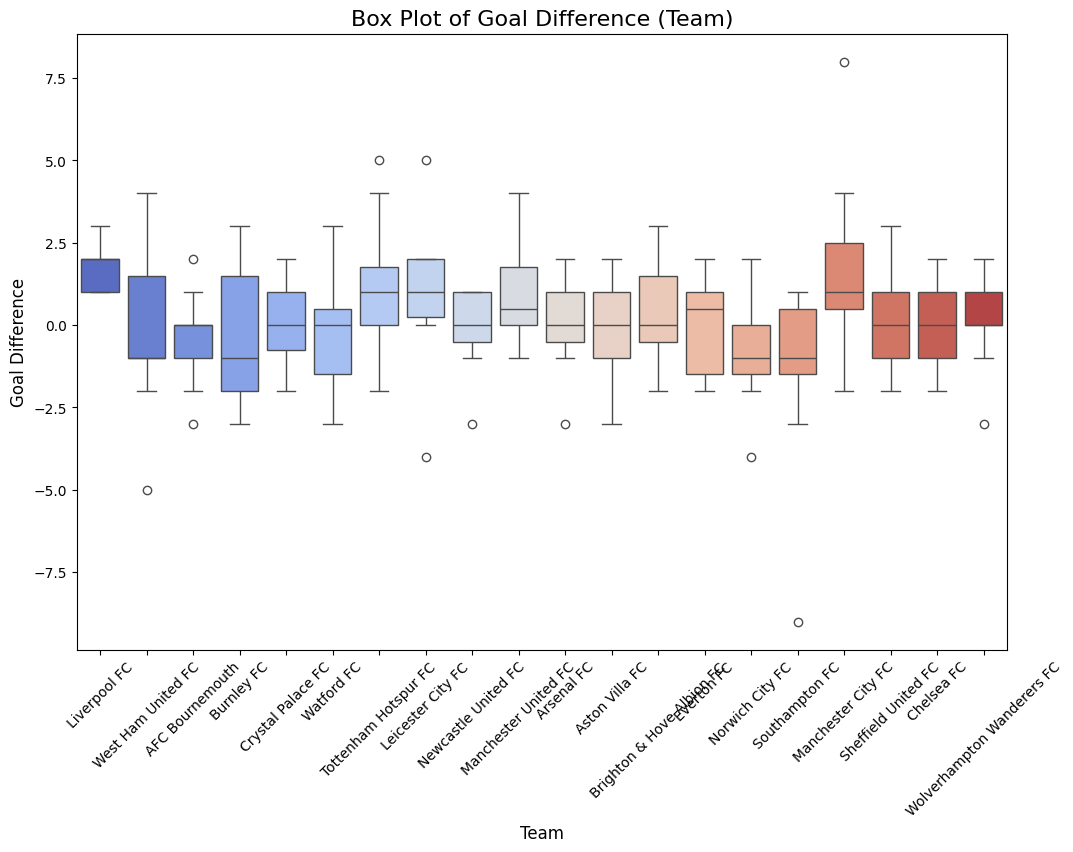

In [327]:
# Calculate goal difference (FTHG - FTAG)
epl['GoalDifference'] = epl['FTHG'] - epl['FTAG']

plt.figure(figsize=(12, 8))
sns.boxplot(data=epl, x='HomeTeam', y='GoalDifference', palette="coolwarm")

plt.title('Box Plot of Goal Difference (Team)', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Goal Difference', fontsize=12)
plt.xticks(rotation=45)
plt.show()

- *If any teams have outliers (points beyond the whiskers), it indicates those teams have extreme goal differences, either very high or very low. For instance, a team with an extremely high positive goal difference might be a dominant team, while a team with a large negative goal difference could be struggling defensively.*
- *As the boxplot shows Manchester City FC has a very positive goal difference and hence the outliers on positive side, and Norwich City FC has the negative side suggesting defensive struggles, which can be colloborated by previous visualizations*

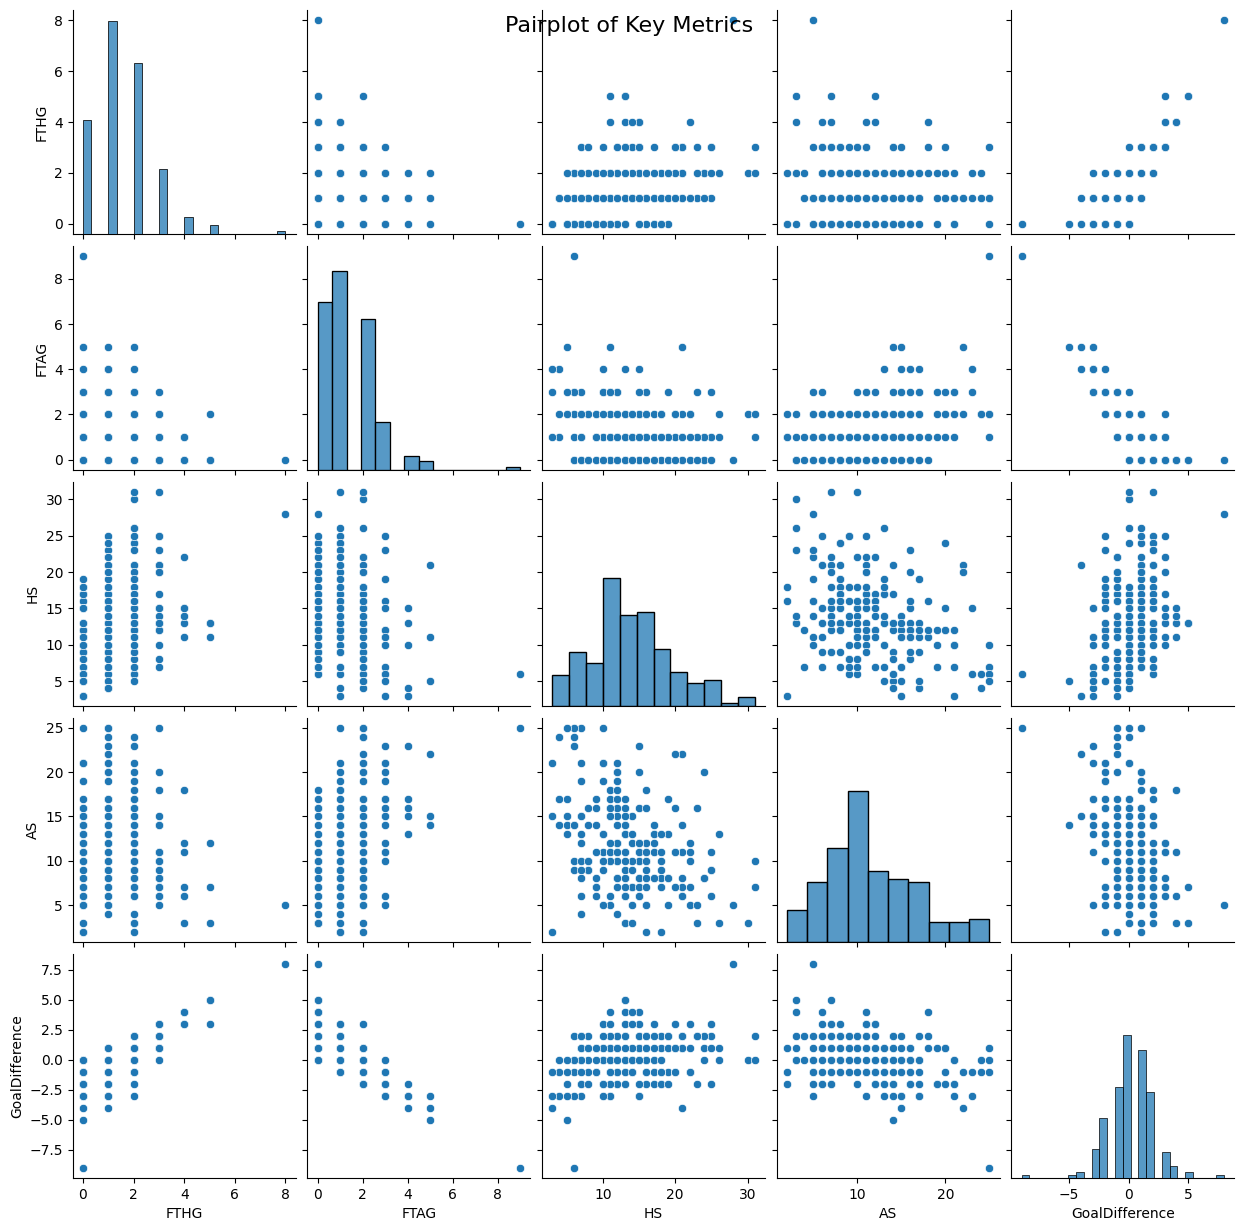

In [336]:
# Create a DataFrame with relevant columns for pairplot
pairplot_data = epl[['FTHG', 'FTAG', 'HS', 'AS', 'GoalDifference']]

sns.pairplot(pairplot_data)
plt.suptitle('Pairplot of Key Metrics', fontsize=16)
plt.show()

- *The diagonal histograms will give you an idea of how each individual metric is distributed across teams (e.g., most teams score between 1 and 3 goals per match).*
- *The scatterplots will provide you with the relationship between variables, such as whether teams that score more goals also win more points or if there is a clear trend between shots and goals.*
- *You can use the correlations to assess which variables are most strongly associated, such as goals scored and points, or shots taken and goals scored.*
- *The pairplot helps you visualize multiple variables at once, and it’s particularly helpful when trying to understand how different aspects of team performance (offensive, defensive, and result-related metrics) relate to each other.*

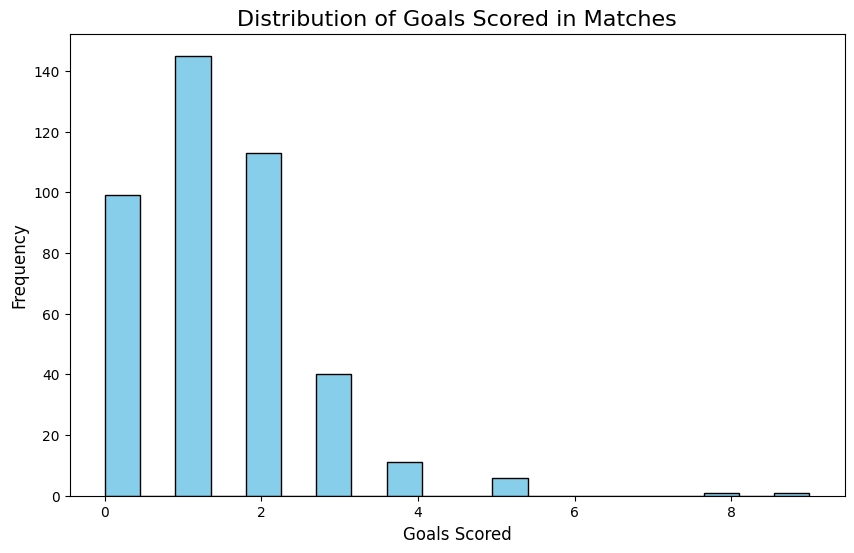

In [331]:
# Distribution of Goals Scored (FTHG and FTAG)
all_goals = pd.concat([epl['FTHG'], epl['FTAG']])

plt.figure(figsize=(10, 6))
all_goals.plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Goals Scored in Matches', fontsize=16)
plt.xlabel('Goals Scored', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


- *The above visualization shows the frequency of the no. of goals scored.As we can see most matches ended with 1 goal followed by 2 goals and No goals(0)*

## Problem Applicability

This project analyzes the 2019-2020 season data from major football leagues, including the Premier League, La Liga, Bundesliga, Serie A, and Ligue 1. The analysis demonstrates how data-driven approaches can uncover meaningful insights in football performance and strategy. These techniques have practical applications in football management, team performance optimization, and fan engagement.

### Applications in Football:
1. **Team Performance Analysis**:
   - Aggregating and transforming match data can help teams evaluate their strengths and weaknesses. Metrics like average goals scored, goal difference, and win percentage provide actionable insights to improve tactics and player performance.

2. **Player Scouting and Recruitment**:
   - By combining datasets from multiple leagues, clubs can identify standout players based on specific criteria such as goal contributions, defensive metrics, or passing accuracy. This aids in making data-driven recruitment decisions.

3. **Match Preparation**:
   - Data aggregation and visualization techniques enable clubs to analyze opponent tendencies, such as formations, strategies, or set-piece effectiveness, leading to better match preparation.

4. **Fan Engagement**:
   - Visualizing data, such as league standings, top scorers, or team performance trends, enhances fan experience by providing accessible and engaging content.

5. **Commercial and Sponsorship Strategies**:
   - Data insights from league performance can also guide sponsorship and marketing strategies, helping clubs or leagues understand their audience and maximize commercial opportunities.

### Broader Relevance:
The data-driven methods showcased in this project, such as aggregating, merging, and visualizing key metrics, can also be applied in other fields like healthcare. For example, tracking team performance parallels how hospitals monitor operational efficiency, while player scouting is similar to identifying high-performing staff or treatment protocols. These techniques demonstrate how analytics can drive improvements across diverse industries.


## Conclusion

This project successfully analyzed data from the 2019-2020 football season, utilizing two different data sources and formats to provide a comprehensive overview of league and team performance. Through multiple merges, aggregations, and transformations, the analysis highlights key trends and patterns that can guide decision-making in football.

By combining robust data handling techniques with visual storytelling, this project not only delivers meaningful insights for football management but also demonstrates the broader utility of data analytics. The techniques applied here—merging datasets, aggregating metrics, transforming data, and creating visualizations—can easily be adapted for use in other industries, such as healthcare, to track performance, improve decision-making, and uncover actionable insights.

This work showcases the power of data-driven approaches in sports analytics and beyond, highlighting the potential for data to transform both on-field strategies and off-field operations.
